In [76]:
import h5py as h5 
import glob,os,ast
import pandas as pd
from tqdm import tqdm
import numpy as np

dloc = 'lsoa'
files = glob.glob(dloc + '/*.csv')
files.sort()
df = pd.read_csv(files[0])
codes = file.GEOGRAPHY_CODE
shape = list(df.shape)
shape.append(len(files))
shape

[34753, 3, 1501]

In [77]:
f = h5.File('test.h5', 'a')

In [78]:
try:del f['indicators']
except:None
indicators = f.create_dataset("indicators", (shape[0],shape[2],shape[1]), dtype='i8')

In [80]:
j=0
dummy = np.empty(shape=(shape[0],shape[2],shape[1]))
for i in tqdm(files):
    df = pd.read_csv(i).set_index('GEOGRAPHY_CODE').loc[codes]
    df['perc'] = (df[df.columns[-1]]/df['0'])*100
    dummy[:,j,:] = df.values
#     indicator_codes.append([os.path.basename(i).split('.')[0],id])
    j += 1



100%|███████████████████████████████████████| 1501/1501 [00:41<00:00, 36.59it/s]


In [83]:
indicators[:,:,:] = dummy.astype('i8')

In [97]:
GEOCD = dict( zip(codes,range(len(codes)) ))
f.attrs['GEOCD'] = str(GEOCD)
fname = dict( [[os.path.basename(i).split('.')[0],j] for j,i in enumerate(files) ])
f.attrs['INDICATORS'] = str(fname)
f.attrs['VALUE'] = str(dict(value=0,count=1,percent=2))
f.attrs['order'] = 'indicators,geocd,values'


In [101]:
# turn back into a dict
ast.literal_eval(f.attrs['VALUE'])


{'value': 0, 'count': 1, 'percent': 2}

In [103]:
# max percent 
f['indicators'][:,:,2].max()

256

In [104]:


f.close()

In [110]:
percentages = pd.DataFrame(dummy[:,:,2])
percentages.describe()

,0,1,2,3,4,5,6,7,8,9,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
count,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,...,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000
mean,98.466196,1.533804,0.000370,1.254094,1.241940,1.233881,1.235854,1.208799,1.180103,1.123778,...,0.052743,0.057453,0.017153,0.002491,0.000955,87.204658,1.578918,2.027050,2.645997,6.543377
std,4.740312,4.740312,0.005263,0.541994,0.527746,0.501791,0.483219,0.461758,0.444467,0.415185,...,0.100033,0.106498,0.040480,0.013691,0.008248,13.546813,2.657567,2.597257,3.110633,6.784120
min,13.260743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,17.668269,0.000000,0.000000,0.000000,0.156372
25%,98.631637,0.000000,0.000000,0.856269,0.858086,0.878378,0.901442,0.887902,0.878972,0.843289,...,0.000000,0.000000,0.000000,0.000000,0.000000,84.360504,0.213523,0.388601,0.589623,2.345059
50%,100.000000,0.000000,0.000000,1.184990,1.174628,1.175606,1.181592,1.161369,1.135718,1.091193,...,0.000000,0.000000,0.000000,0.000000,0.000000,93.056550,0.556586,0.925314,1.298053,3.862069
75%,100.000000,1.368363,0.000000,1.581395,1.549464,1.528839,1.513718,1.479795,1.439342,1.369863,...,0.067659,0.070126,0.000000,0.000000,0.000000,96.093101,1.692525,2.606178,3.484938,7.389831
max,100.000000,86.739257,0.250470,4.785894,5.857564,4.290221,4.248768,4.915347,5.941846,3.567110,...,2.600297,2.848265,0.679852,0.475436,0.240096,99.787836,40.711598,27.824519,28.541076,52.183735


ModuleNotFoundError: No module named 'scipy'

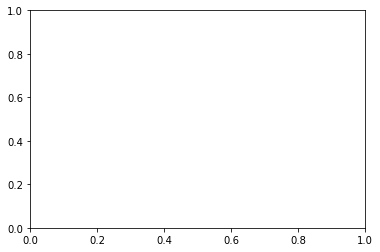

In [111]:
percentages.plot(kind='kde')

In [ ]:
!conda install scipy


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Examining conflict for libspatialite pyproj libcurl cfitsio fiona hdf5 geotiff | 